# Astrophysical Reactions - $CNO$ Cycle

In [1]:
import pynucastro as pyrl

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

There are several nuclear reactions chains inside the stellar cores, as $pp$ chain, the CNO cycle and the NeNa cycle. These are important both for the nuclesynthesis and the energy production in the stars.

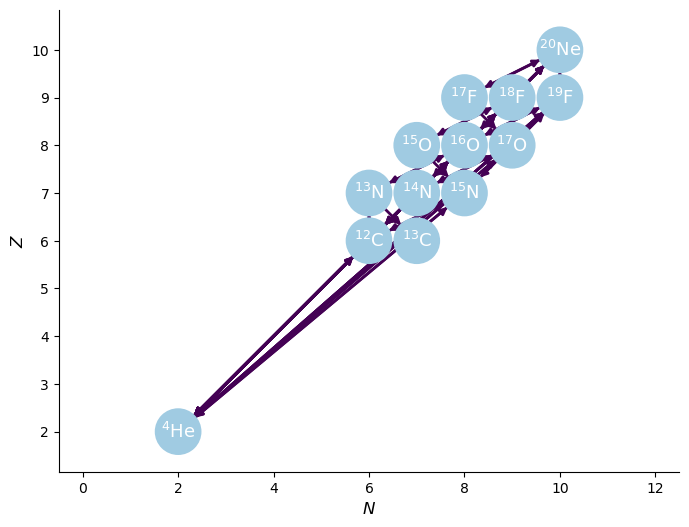

In [4]:
library = pyrl.ReacLibLibrary()

cno_nuclei = ["p", "he4", "c12", "c13", "n13", "n14", "n15", "o15", "o16", "o17", "f17", "f18", "f19", "ne20"]
cno_library = library.linking_nuclei(cno_nuclei)
cno_network = pyrl.networks.PythonNetwork(libraries=cno_library)

fig = cno_network.plot()

To evaluate the rates, we need to set the composition of our star. Let's try a solar like:

In [5]:
comp = pyrl.Composition(list(cno_library.get_nuclei()))
comp.set_solar_like()

Now we can visualize our reaction network:

In [6]:
rc = pyrl.RateCollection( libraries=cno_library )
re = pyrl.Explorer(rc, comp, size=(1000,1000), ydot_cutoff_value=1.e-25)
re.explore()

interactive(children=(FloatSlider(value=4.0, description='logrho', max=6.0, min=2.0), FloatSlider(value=8.0, d…

Now we can write our $pp$ chain network. This permits to solve the differential equation and get the abundance evolution of each nuclei. In order to do that, we must also set the initial abundances for each nuclei:

In [7]:
cno_network.write_network('cno_network_module.py')

import cno_network_module as cno

tmax = 1.e20

rho = 150
T = 1.5e7

X0 = np.zeros(cno.nnuc)

X0[cno.jp] = 0.7
X0[cno.jhe4] = 0.28
X0[cno.jc12] = 0.02

Y0 = X0/cno.A

sol = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF", dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)

Now we can plot the solution we calculated and see how the abundances change with time:

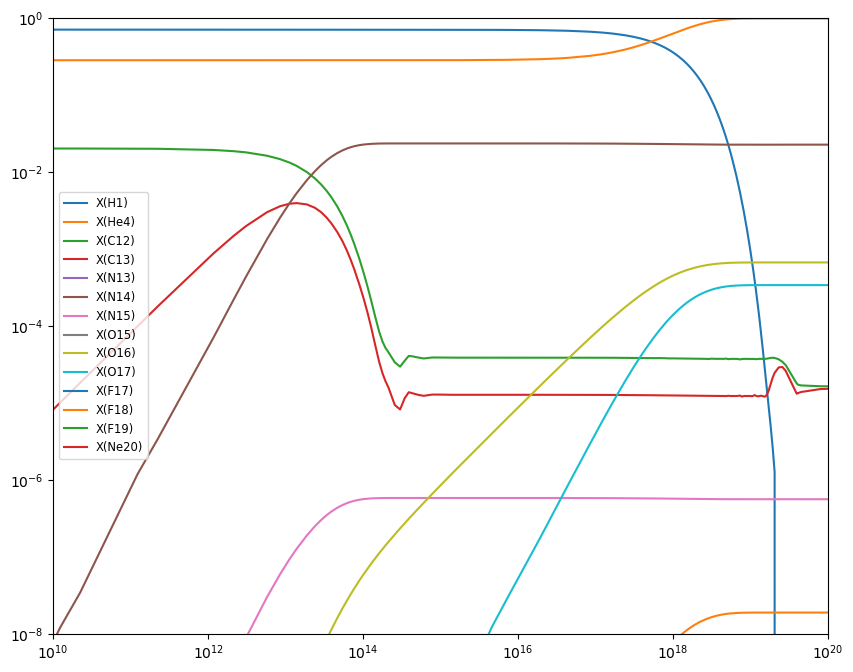

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(cno.nnuc):
    ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=f"X({cno.names[i].capitalize()})")

ax.set_xlim(1.e10, 1.e20)
ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")

fig.set_size_inches((10, 8))